<a href="https://colab.research.google.com/github/0Kyumy0/sales-predictions/blob/main/salesPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = '/content/drive/MyDrive/DataScience/BasesDeDatos/sales_predictions.csv'

In [3]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Data Cleaning**

## 1) How many rows and columns does the dataframe have?

In [4]:
df.shape

(8523, 12)

## 2) What are the data types in each variable?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 3) Are there duplicates? If that's the case, remove some duplicates.

In [6]:
df.duplicated().sum()

0

There are no duplicated data in the dataframe

## 4) Identify the missing values.

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

This is a dataframe of the Items which have NaN value in their Item_Weight

In [8]:
df.loc[(df['Item_Weight'].isna() == True)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


This is a dataframe of the Items which have NaN value in their Outlet_Size 

In [9]:
df.loc[(df['Outlet_Size'].isna() == True)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


## 5) Decide how to address the missing values. (This requires your criteria, so please explain your choice.)

## Item_Weight

The Item_Weight values ​ have a relation with the Item_Identifier values, where data with the same Item_Identifier had the same Item_Weight value. So I filled in the empty data according to this information. And finally there were only 4 unique index ​​left in  the Item_Identifier values with no values in the Item_Weight field, so I decided to delete them.

In [10]:
df['Item_Weight'].isna().sum()

1463

In [11]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [12]:
# Álvaro's code
# In essence, what thid does is that the .transform returns the average of the Item_Weight according to the 
# Item_Identifier but returns it with the index of the row, and a replacement is made accordingly of only the 
# empty data of the Item_Weight column.
df['Item_Weight'].fillna(df.groupby(['Item_Identifier'])['Item_Weight'].transform('mean'), inplace=True)

In [13]:
df.groupby(['Item_Identifier'])['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [14]:
df.groupby(['Item_Identifier'])['Item_Weight'].transform('mean')

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [15]:
# theres still 4 NaN values! 
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
df.loc[(df['Item_Weight'].isna())]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [17]:
df.loc[(df['Item_Identifier'] == 'FDK57')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.044,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.228


In [18]:
# In here I drop only the 4 rows
df.dropna(subset=['Item_Weight'], inplace = True)

## Outlet_Size

What I did for this column was that I related the Outlet_Size and Outlet_Location_Type columns according to the size mode that occurs in each Tier. I placed that mode value corresponding to its respective Tier of the 3 Outlet_Identifiers with NaN values ​​in their Outlet_Size values.

In [19]:
df['Outlet_Size'].isna().sum()

2410

In [20]:
# I verify if any other column has a co-relation between each other
df.groupby(['Outlet_Type', 'Outlet_Location_Type'])['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          527
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                   Tier 2                Small          930
                   Tier 3                High           932
Supermarket Type2  Tier 3                Medium         928
Supermarket Type3  Tier 3                Medium         932
Name: Outlet_Size, dtype: int64

In [21]:
df.groupby('Outlet_Location_Type')['Outlet_Size'].agg(pd.Series.mode)

Outlet_Location_Type
Tier 1     Small
Tier 2     Small
Tier 3    Medium
Name: Outlet_Size, dtype: object

In [22]:
df.groupby(['Outlet_Identifier'])['Outlet_Size'].count()

Outlet_Identifier
OUT010      0
OUT013    932
OUT017      0
OUT018    928
OUT019    527
OUT027    932
OUT035    930
OUT045      0
OUT046    930
OUT049    930
Name: Outlet_Size, dtype: int64

In [23]:
df.loc[df['Outlet_Identifier'] == 'OUT010'] = df.loc[df['Outlet_Identifier'] == 'OUT010'].fillna('Medium')
df.loc[df['Outlet_Identifier'] == 'OUT017'] = df.loc[df['Outlet_Identifier'] == 'OUT017'].fillna('Small')
df.loc[df['Outlet_Identifier'] == 'OUT045'] = df.loc[df['Outlet_Identifier'] == 'OUT045'].fillna('Small')

In [24]:
df.loc[df['Outlet_Identifier'] == 'OUT017']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,Small,Tier 2,Supermarket Type1,838.9080
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,Small,Tier 2,Supermarket Type1,3121.2704
54,NCP18,12.150,Low Fat,0.028760,Household,151.4708,OUT017,2007,Small,Tier 2,Supermarket Type1,4815.0656
73,FDG02,7.855,Low Fat,0.011325,Canned,189.6188,OUT017,2007,Small,Tier 2,Supermarket Type1,2285.0256
...,...,...,...,...,...,...,...,...,...,...,...,...
8493,FDP21,7.420,Regular,0.025886,Snack Foods,189.1872,OUT017,2007,Small,Tier 2,Supermarket Type1,4727.1800
8494,NCI54,15.200,Low Fat,0.000000,Household,110.4912,OUT017,2007,Small,Tier 2,Supermarket Type1,1637.8680
8496,FDJ57,7.420,Regular,0.021696,Seafood,185.3582,OUT017,2007,Small,Tier 2,Supermarket Type1,3715.1640
8500,NCQ42,20.350,Low Fat,0.000000,Household,125.1678,OUT017,2007,Small,Tier 2,Supermarket Type1,1907.5170


In [25]:
df['Outlet_Size'].value_counts()

Small     4242
Medium    3345
High       932
Name: Outlet_Size, dtype: int64

## 6) Confirm that there are no missing values ​​after addressing them.

In [26]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7) Find and fix some inconsistent category of data (example: fix cat, Cat, and cats so that they are consistent)

Only changes were made to the Item_Fat_Content values ​​since there was an inconsistency with the data 

In [27]:
df['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

In [29]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')

In [30]:
# I verify if theres another inconsistence in the column 'Item_Type'
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [31]:
# I verify if theres another inconsistence in the column 'Outlet_Type'
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## 8) For any numeric column, get the summary statistics for each (min, max, and mean)

General statistical data of Item_MRP values

In [32]:
df['Item_MRP'].describe().round(3)

count    8519.000
mean      141.010
std        62.284
min        31.290
25%        93.845
50%       143.047
75%       185.677
max       266.888
Name: Item_MRP, dtype: float64

# Data Visualization

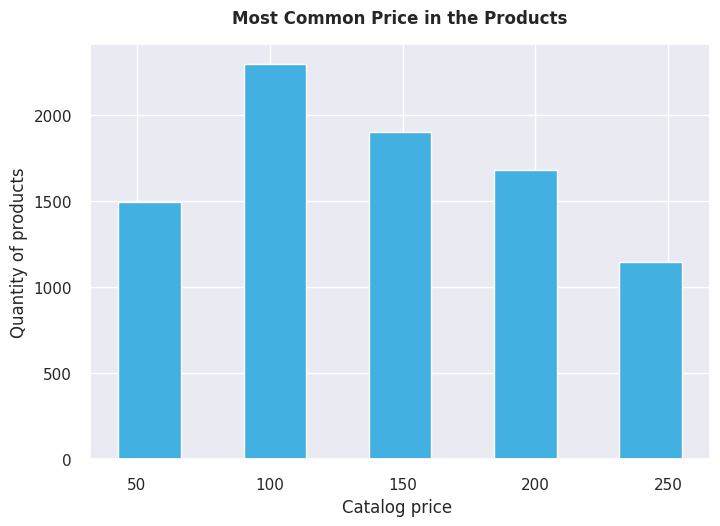

In [269]:
sns.set();

fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)

ax1.hist(df['Item_MRP'], 
         bins = 5, 
         density=False, 
         rwidth=0.5,
         color = '#42B0E0');

ax1.set_xlabel('Catalog price ');  # Precio máximo de venta al público (precio de catálogo) del producto
ax1.set_ylabel('Quantity of products');
ax1.set_title('Most Common Price in the Products', loc="center", fontweight='bold', y=1.03);

In [74]:
filter_Item_Type = df['Item_Type'].value_counts()
filter_Item_Type_top5 = filter_Item_Type.head(5)
filter_Item_Type_top5

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Name: Item_Type, dtype: int64

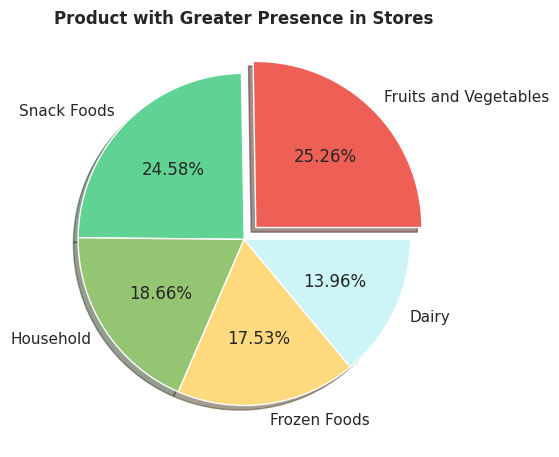

In [253]:
sns.set();

etiquetas = filter_Item_Type_top5.index.tolist()
colores = ["#EE6055","#60D394","#93C572","#FFD97D", '#CDF4F7']
explotar = [0.1, 0, 0, 0, 0] 

fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)

ax1.pie(filter_Item_Type_top5, 
        labels = etiquetas, 
        autopct='%.2f%%', 
        colors = colores,
        explode = explotar,
        shadow = True
        );

ax1.set_title('Product with Greater Presence in Stores', fontweight='bold');

In [230]:
filtro_mayores_ventas = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
filtro_mayores_ventas_sorted = filtro_mayores_ventas.sort_values(ascending = True)

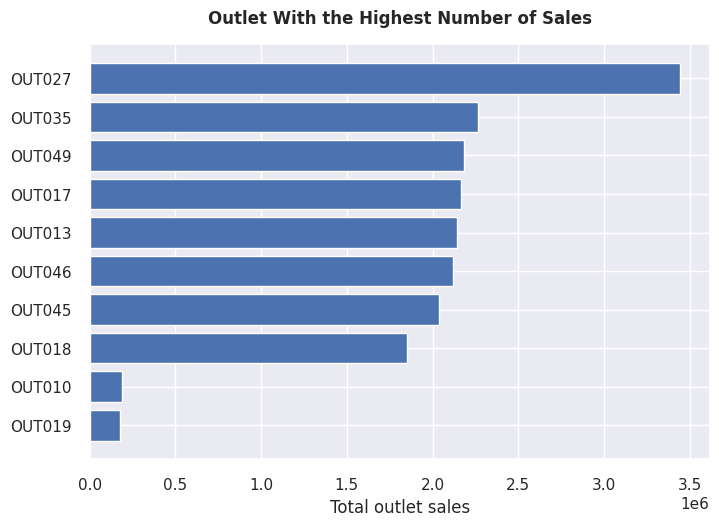

In [267]:
sns.set();

fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)

ax1.barh(filtro_mayores_ventas_sorted.index, filtro_mayores_ventas_sorted.values);

ax1.set_xlabel('Total outlet sales');
ax1.set_title('Outlet With the Highest Number of Sales', loc="center", fontweight='bold', y=1.03);

In [245]:
ft_Item_Type_MS = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
ft_Item_Type_MS_top5 = ft_Item_Type_MS.sort_values(ascending=False).head(5)
ft_Item_Type_MS_low5 = ft_Item_Type_MS.sort_values(ascending=True).head(5)

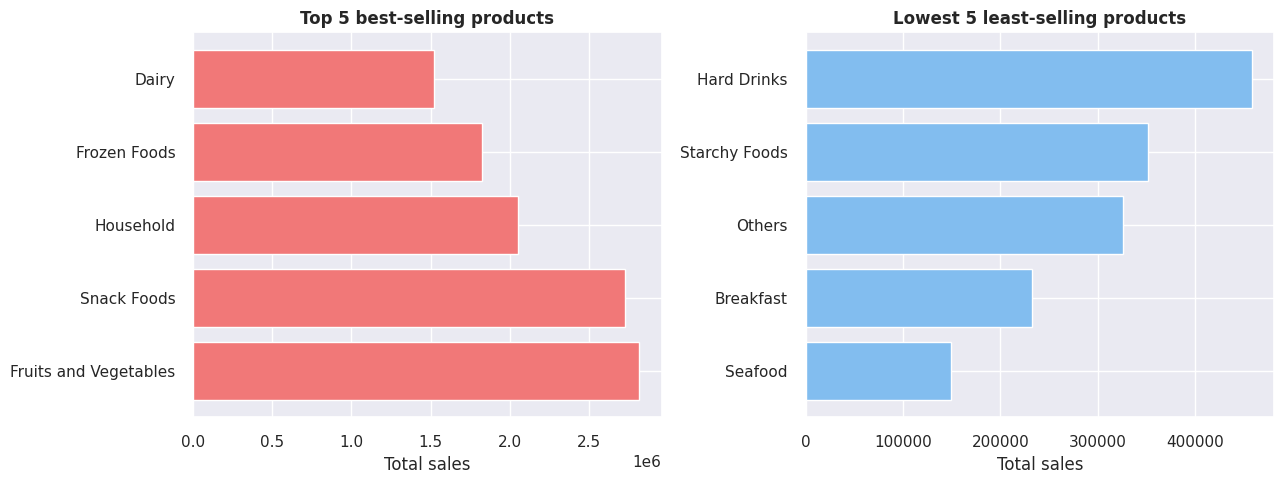

In [250]:
sns.set();

fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,2,1)

fig1.set_size_inches(13, 5);

ax1.barh(ft_Item_Type_MS_top5.index, ft_Item_Type_MS_top5.values,
        color = '#F17878');

ax1.set_xlabel('Total sales');
ax1.set_title('Top 5 best-selling products', loc="center", fontweight='bold');

#---------- 2ND GRAPHIC----------#
ax2 = fig1.add_subplot(1,2,2)

ax2.barh(ft_Item_Type_MS_low5.index, ft_Item_Type_MS_low5. values,
        color = '#82BDEF');

ax2.set_xlabel('Total sales');
ax2.set_title('Lowest 5 least-selling products', loc="center", fontweight='bold');


fig1.tight_layout();

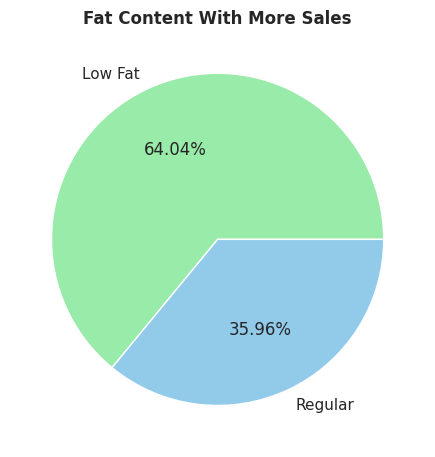

In [249]:
filter_fat_content = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()

sns.set();

colores = ['#98EBA8','#92CBEA']
etiquetas = ['Low Fat','Regular']

fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)

ax1.pie(filter_fat_content,
        labels = etiquetas,
        autopct='%.2f%%',
        colors = colores);

ax1.set_title('Fat Content With More Sales', fontweight='bold');

In [206]:
corr = df.corr()

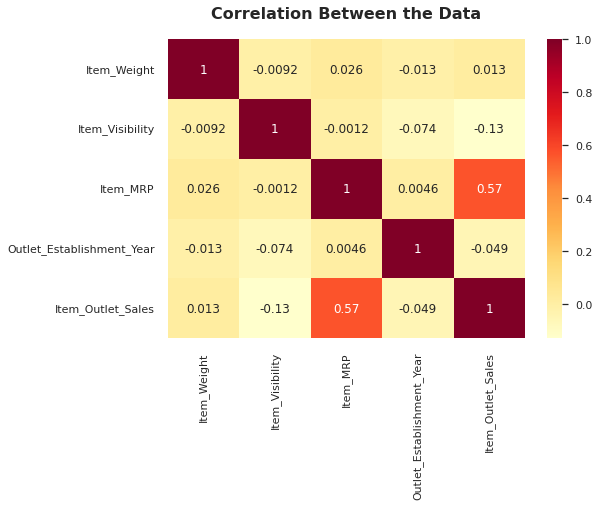

In [261]:
sns.heatmap(corr, 
            cmap = 'YlOrRd', 
            annot = True);

plt.title('Correlation Between the Data', fontweight='bold', fontsize=16, y=1.05);

In [270]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [54]:
df.groupby(['Item_Identifier', 'Outlet_Identifier'])['Item_Outlet_Sales'].sum()

Item_Identifier  Outlet_Identifier
DRA12            OUT010                283.6308
                 OUT013               2552.6772
                 OUT017               2552.6772
                 OUT018                850.8924
                 OUT035                992.7078
                                        ...    
NCZ54            OUT019                162.4552
                 OUT027               5523.4768
                 OUT045               2274.3728
                 OUT046               4711.2008
                 OUT049               7148.0288
Name: Item_Outlet_Sales, Length: 8519, dtype: float64